In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os, sys, time
sys.path.append('../laba')
%matplotlib inline
from RegexParser import RegexParser
from SMCParser import SMCParser
from LexParser import LexParser


In [2]:
def test(laba, fileName='./timing.txt', splits_num=10, iters=5000):
  pd_res = None
  with open(fileName, 'r', encoding='UTF-8') as inp:
    for i, line in enumerate(inp):
      pass
    lines_num = i+1

    splits = np.linspace(0, lines_num, splits_num)[1:]
    lines = inp.readlines()

    for sp in splits:
      a = []
      ed = int(sp)
      for j in range(iters):
        start = time.time_ns()
        for line in lines[:ed]:
          laba.parse(line)
        end = time.time_ns()
        a.append(end-start)

      res = {f'{ed}':a}
      tmp = pd.DataFrame.from_dict(res)
      tmp = tmp.sort_values(tmp.columns[0],ignore_index=True)
      tmp = tmp.iloc[5:-5, :]
    
      
      if pd_res is None:
        pd_res = tmp
      else:
        pd_res = pd.concat([pd_res, tmp], axis=1)
  pd_res
  return pd_res
        


In [3]:
smc = SMCParser()
regex = RegexParser()
lex = LexParser().build()

In [21]:
def graph(pds, names, name=''):
  plt.style.use('dark_background')
  fig = plt.figure(figsize=(10,5))
  cmaps = plt.colormaps()
  for i, p in enumerate(pds):
    y = p.mean()
    x = y.index
    s = p.std()/10
    plt.scatter(x, y, label=names[i], cmap=cmaps[i])
    plt.plot(x, y)
    plt.fill_between(x, y-s, y+s, alpha=.3, cmap=cmaps[i])
  fig.legend()
  plt.ylabel('ns')
  plt.xlabel('rows')
  plt.title(name)

In [22]:
testFiles = sorted([i for i in os.listdir('../tests') if i.split('.')[-1] == 'test'])
testFiles

['03_10_2021_00_26_27__10000__20.test',
 '03_10_2021_00_26_34__10000__50.test',
 '03_10_2021_00_26_42__10000__100.test',
 '03_10_2021_00_26_51__10000__200.test',
 '03_10_2021_00_27_06__10000__500.test',
 '03_10_2021_00_31_11__10000__1000.test',
 'test1.test',
 'test2.test']

In [23]:
selectedTests = lambda i: (os.path.join('../tests/', testFiles[i]),lambda x: test(x, fileName=os.path.join('../tests/', testFiles[i])))

In [24]:
labas = [smc, regex, lex]
names = ['smc', 'regex', 'lex']
name, testik = selectedTests(0)
pds = list(map(testik, labas))

In [25]:
ff = testik(smc)

In [26]:
(ff - ff.mean())/ff.std()

,1111,2222,3333,4444,5555,6666,7777,8888,10000
5,-1.074191,-1.793444,-1.882865,-1.426624,-1.104558,-3.825761,-1.118936,-0.953153,-2.711891
6,-1.074191,-1.793444,-1.882865,-1.426624,-1.104558,-3.825761,-1.118936,-0.953153,-1.487060
7,-1.074191,-1.793444,-1.882865,-1.426624,-1.104558,-3.825761,-1.118936,-0.953153,-1.487060
8,-1.074191,-1.793444,-1.882865,-1.426624,-1.104558,-3.825761,-1.118936,-0.953153,-1.487060
9,-1.074191,-1.793444,-1.882865,-1.426624,-1.104558,-3.825761,-1.118936,-0.953153,-1.487060
...,...,...,...,...,...,...,...,...,...
4990,10.432842,7.270480,6.039305,10.073356,5.737303,2.531190,9.811727,10.509947,2.731800
4991,10.445742,7.270480,6.039305,11.906022,5.737303,3.653005,9.921034,11.847309,2.731800
4992,10.832750,7.270480,6.039305,12.822355,5.737303,3.653005,9.921034,11.847309,3.956631
4993,11.335860,7.270480,8.003479,13.738688,6.604582,4.899466,13.200233,13.694141,4.092723


In [27]:
def doTest(i):
  labas = [smc, regex, lex]
  names = ['smc', 'regex', 'lex']
  name, testik = selectedTests(i)
  pds = list(map(testik, labas))
  graph(pds, names, name)

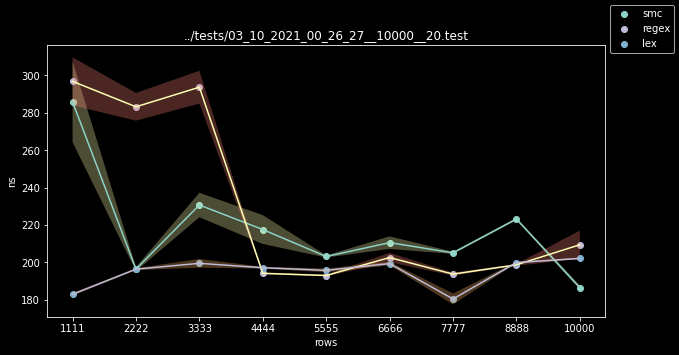

In [29]:
doTest(0)

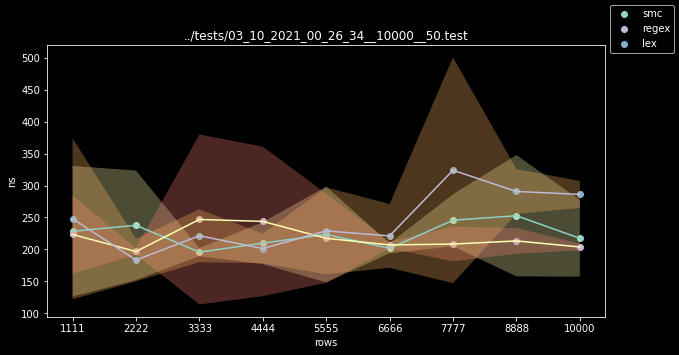

In [14]:
doTest(1)

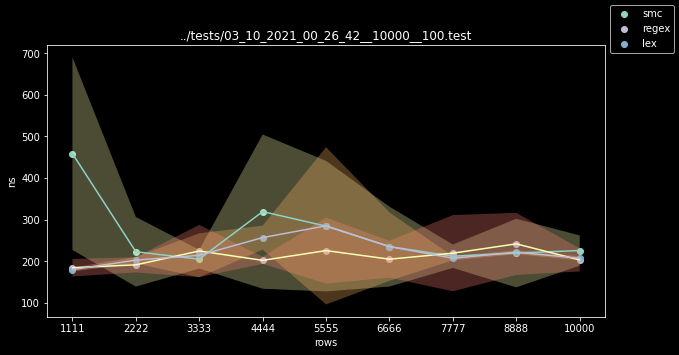

In [15]:
doTest(2)

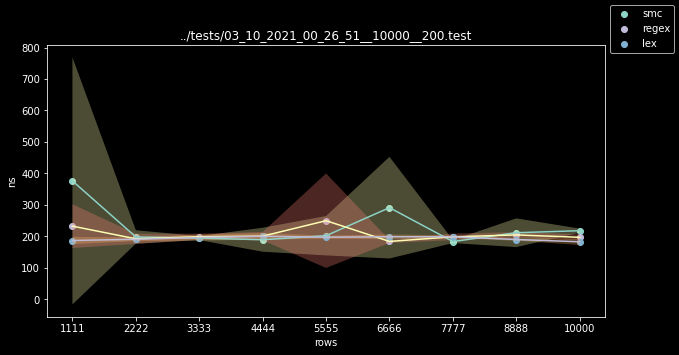

In [16]:
doTest(3)

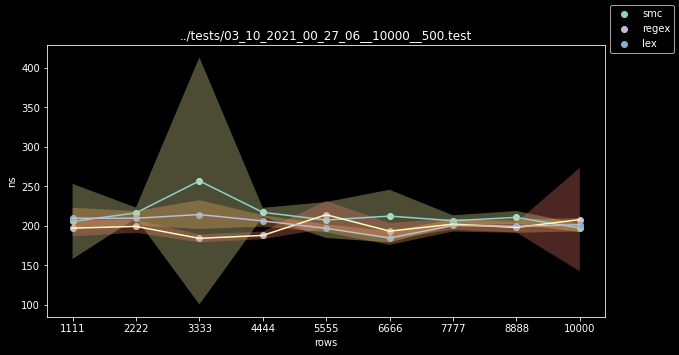

In [17]:
doTest(4)

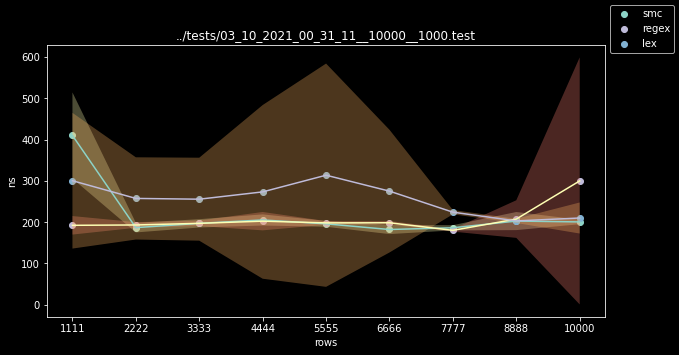

In [18]:
doTest(5)